# SVM with linear Kernel
> Name: Debatreya Das <br>
> Roll No. 12212070 <br>
> CS-A4 <br>
> ML Lab 11 <br>

## Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Use sklearn for only the train_test_split function and make_blobs for generating data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Define the SVM class
- y_: Converted labels to -1 and 1 for ease of computation.
- For each iteration, we check if the data point meets the condition.
- If correctly classified, only the regularization term updates w.
- If incorrectly classified, both the regularization term and the loss term affect w and b.

In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights to zero
        self.w = np.zeros(n_features)
        self.b = 0

        # Convert labels to -1 and 1 if not already
        y_ = np.where(y <= 0, -1, 1)

        # Gradient Descent for SVM
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # If the data point is correctly classified
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    # If the data point is incorrectly classified
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    # Predict the class of the data points
    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


## Dataset

In [6]:
# make_blobs is used to generate data
X, y = make_blobs(n_samples=50, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

## Train the Model

In [7]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)

## Visualize Dataset

- We plot the decision boundary by solving for the line equation based on the SVM's learned weights and bias.
- The decision boundary is the line for which w . x + b = 0.
- We add margin lines at ±1 from the decision boundary to visualize the support vectors.

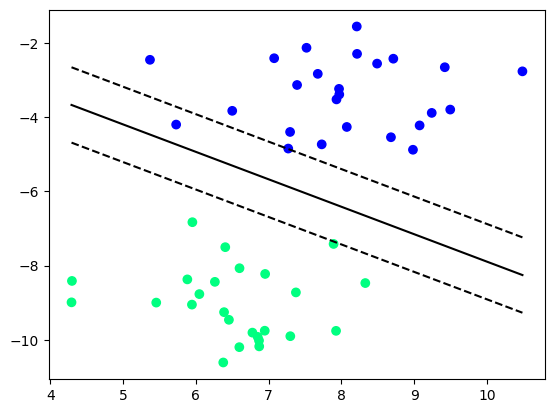

In [8]:
# Step 6: Visualize the decision boundary
def plot_svm_decision_boundary(X, y, model):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig, ax = plt.subplots()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

    # Decision boundary
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    # Calculate decision boundary points
    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

    # Margin lines
    x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)
    x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k--")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k--")

    plt.show()

# Plot the decision boundary
plot_svm_decision_boundary(X, y, svm)